# Part A | Defining the Question

In your own words, define the objectives that the Boulder County Assessor's Office is asking you to address.

What is the population of interest? What data is actually available? How could this affect your analysis?

Provide at least three questions that are interesting, specific, and actionable that could be used to help solve the problem that you defined in Q1.


# Part B | Getting the Data

Load the following datasets into your environment:
    `property.csv`
    `building.csv`
    `land.csv`
   ` valuations.csv`
    `sales.csv`
    `time_trend_adjustment.csv`
Create an adjusted_sales_price using the time and location trend adjustment factor.
Engineer at least three new features for the data frame.
Ensure the rest of the data is tidy.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

building_df = pd.read_csv('./datasets/building.csv')
land_df = pd.read_csv('./datasets/land.csv')
property_df = pd.read_csv('./datasets/property.csv')
sales_df = pd.read_csv('./datasets/sales.csv')
time_trend_adjustments_df = pd.read_csv('./datasets/time_trend_adjustments.csv')
valuations_df = pd.read_csv('./datasets/valuations.csv')

In [26]:
df = valuations_df.merge(property_df, on='strap', how='left')
df = df.merge(building_df, on='strap', how='left')
df = df.merge(land_df, on='strap', how='left', suffixes=('', '_land'))
df.describe()

,tax_yr,bld_appraised_val,land_appraised_val,total_appraised_val,bld_assessed_val,land_assessed_val,total_assessed_val,market_area,sub_code,section,...,nbr_three_qtr_baths,nbr_half_baths,nbr_rooms_nobath,total_finished_sqft,mainfloor_sqft,bsmt_sqft,ext_wall_code,land_class,sqft,acreage
count,3962.0,3.962000e+03,3.962000e+03,3.962000e+03,3960.000000,0.0,3962.000000,3962.000000,3962.000000,3962.000000,...,3960.000000,3960.000000,3960.000000,3563.000000,3552.000000,2242.000000,3796.000000,3962.000000,3962.000000,3962.000000
mean,2024.0,9.236000e+05,1.195717e+06,2.119317e+06,61738.478535,NaN,138353.915952,104.778142,4895.477537,27.898788,...,0.654545,0.362879,7.000253,1998.427449,1360.340653,852.958073,39.039779,1112.169107,8909.002776,0.204431
std,0.0,8.054223e+05,5.753425e+05,1.186266e+06,54008.637305,NaN,79471.842856,2.846400,3113.481905,9.072855,...,0.856371,0.542590,3.260323,965.375494,577.330701,471.134175,29.069110,16.129343,11519.161883,0.264534
min,2024.0,0.000000e+00,2.101750e+05,2.468000e+05,0.000000,NaN,12851.000000,101.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,144.000000,30.000000,47.000000,0.000000,100.000000,25.000000,0.000000
25%,2024.0,4.006000e+05,8.424925e+05,1.369000e+06,26733.000000,NaN,88039.750000,102.000000,1913.000000,29.000000,...,0.000000,0.000000,5.000000,1303.000000,980.000000,504.000000,10.000000,1112.000000,5798.000000,0.133000
50%,2024.0,7.053000e+05,1.041450e+06,1.785600e+06,47054.500000,NaN,115983.500000,105.000000,4888.000000,30.000000,...,0.000000,0.000000,7.000000,1847.000000,1274.500000,790.500000,30.000000,1112.000000,6985.000000,0.160000
75%,2024.0,1.181925e+06,1.408000e+06,2.500375e+06,78931.000000,NaN,163883.500000,107.000000,8343.000000,31.000000,...,1.000000,1.000000,9.000000,2478.500000,1650.000000,1121.500000,70.000000,1112.000000,9837.500000,0.226000
max,2024.0,7.037300e+06,6.585700e+06,1.126890e+07,471499.000000,NaN,751331.000000,109.000000,9921.000000,36.000000,...,10.000000,3.000000,19.000000,8734.000000,5582.000000,4214.000000,140.000000,1140.000000,447958.000000,10.284000


median of total valuations: 1785600.0


count    3.962000e+03
mean     2.119317e+06
std      1.186266e+06
min      2.468000e+05
25%      1.369000e+06
50%      1.785600e+06
75%      2.500375e+06
max      1.126890e+07
Name: total_appraised_val, dtype: float64

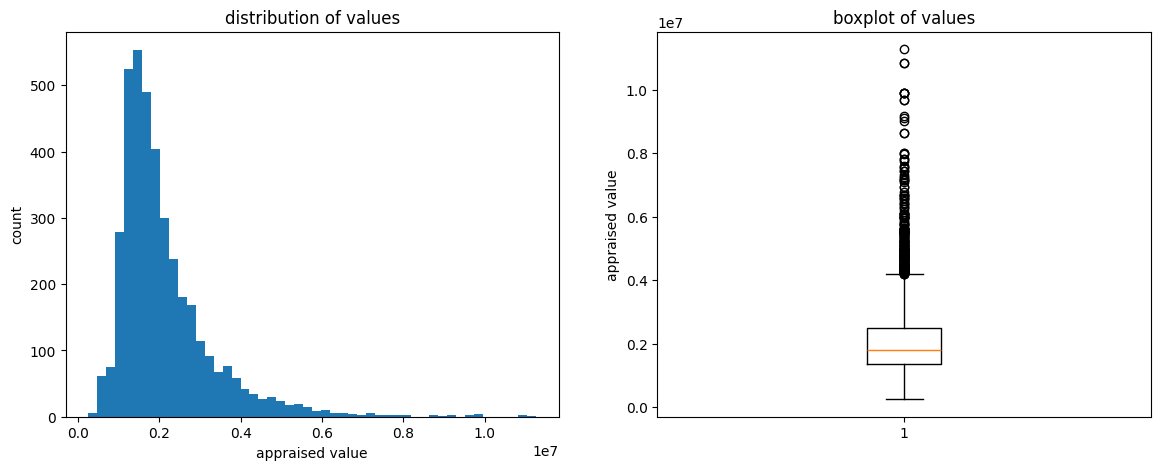

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
axes[0].hist(df.total_appraised_val.dropna(), bins=50)
axes[0].set_xlabel('appraised value')
axes[0].set_ylabel('count')
axes[0].set_title('distribution of values')

axes[1].boxplot(df.total_appraised_val.dropna())
axes[1].set_ylabel('appraised value')
axes[1].set_title('boxplot of values')
print(f'median of total valuations: {df.total_appraised_val.median()}')
df.total_appraised_val.describe()

median of total square feet: 1847.0


count    3563.000000
mean     1998.427449
std       965.375494
min       144.000000
25%      1303.000000
50%      1847.000000
75%      2478.500000
max      8734.000000
Name: total_finished_sqft, dtype: float64

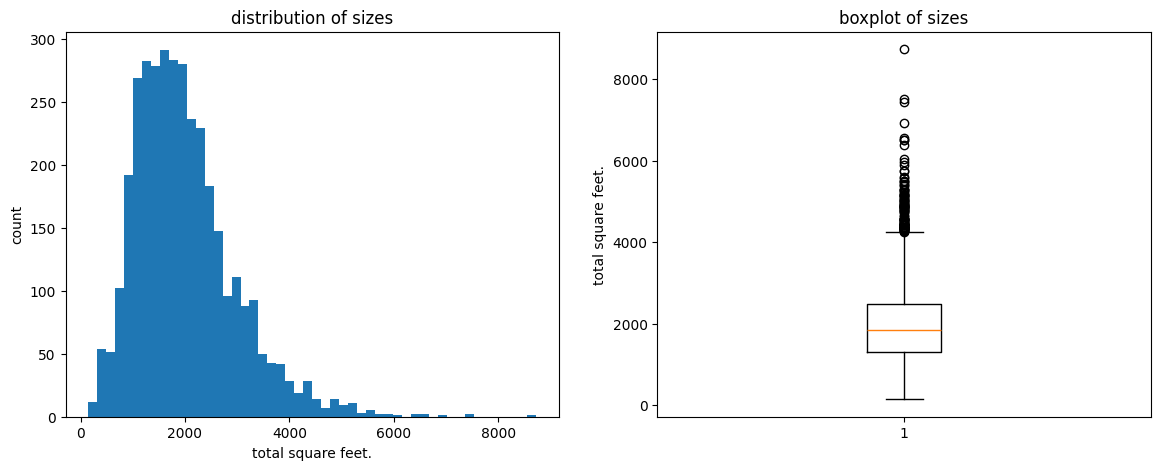

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
axes[0].hist(df.total_finished_sqft.dropna(), bins=50)
axes[0].set_xlabel('total square feet.')
axes[0].set_ylabel('count')
axes[0].set_title('distribution of sizes')

axes[1].boxplot(df.total_finished_sqft.dropna())
axes[1].set_ylabel('total square feet.')
axes[1].set_title('boxplot of sizes')
print(f'median of total square feet: {df.total_finished_sqft.median()}')
df.total_finished_sqft.describe()

Text(0, 0.5, 'count')

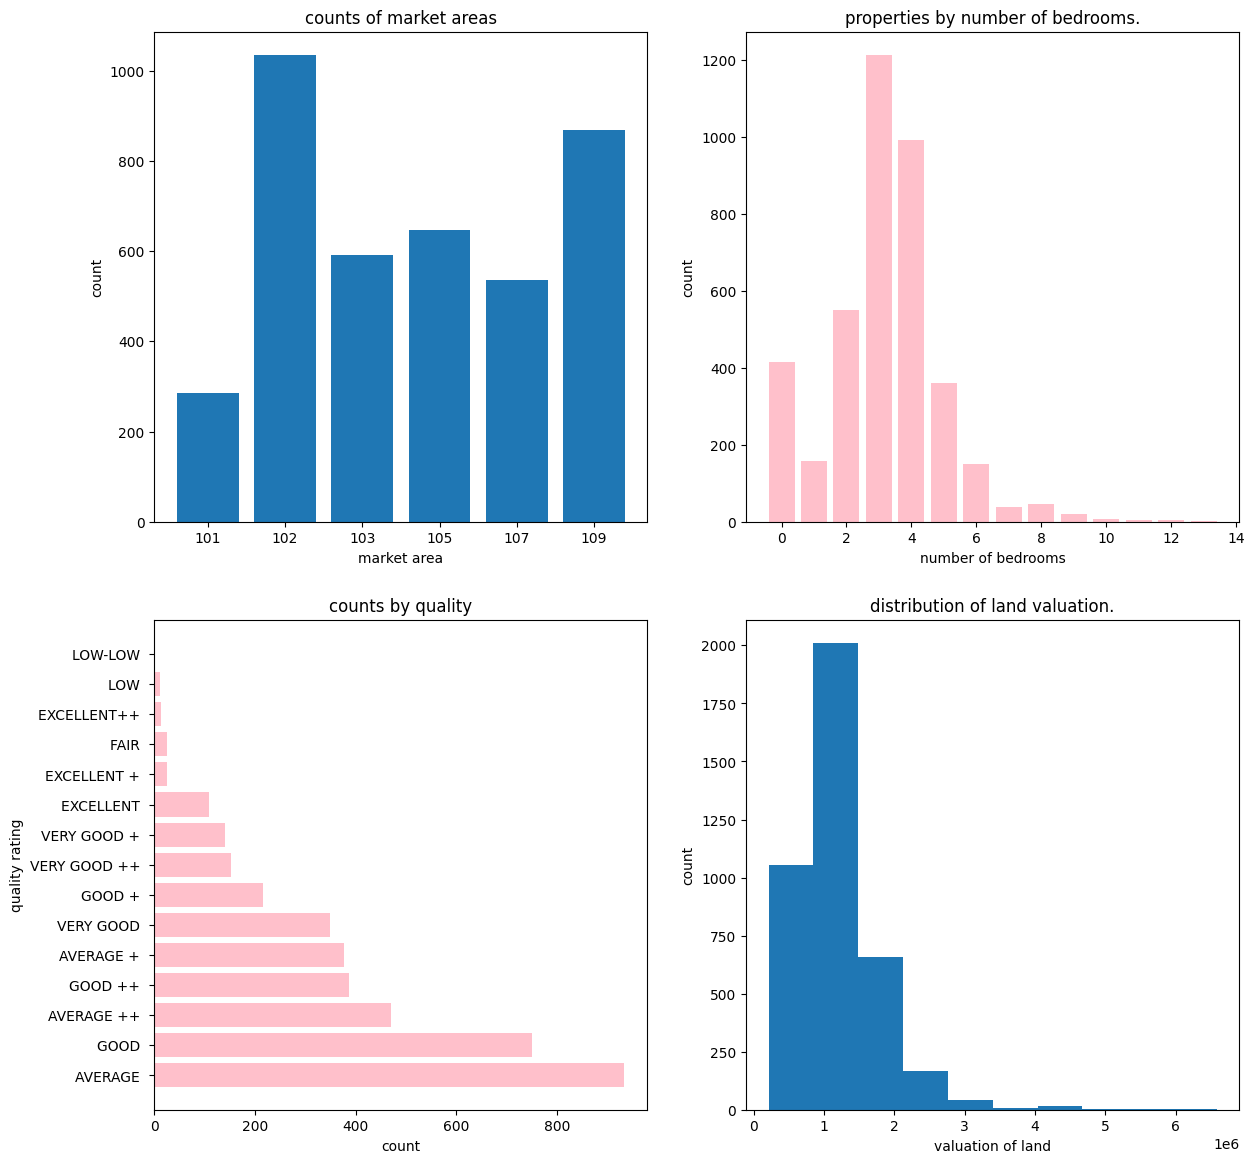

In [29]:
fig, axes = plt.subplots(2, 2, figsize = (14, 14))

market_counts = df.market_area.value_counts().sort_index()
axes[0, 0].bar(market_counts.index.astype(str), market_counts.values)
axes[0, 0].set_xlabel('market area')
axes[0, 0].set_ylabel('count')
axes[0, 0].set_title('counts of market areas')

br_counts = df.nbr_bed_room.value_counts().sort_index()
axes[0,1].bar(br_counts.index, br_counts.values, color='pink')
axes[0,1].set_xlabel('number of bedrooms')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('properties by number of bedrooms.')

quality_rating = df.quality.value_counts()
axes[1, 0].barh(quality_rating.index, quality_rating.values, color = 'pink')
axes[1, 0].set_title('counts by quality')
axes[1, 0].set_xlabel('count')
axes[1, 0].set_ylabel('quality rating')

axes[1, 1].hist(df.land_appraised_val)
axes[1, 1].set_title('distribution of land valuation.')
axes[1, 1].set_xlabel('valuation of land')
axes[1, 1].set_ylabel('count')


Text(0, 0.5, 'Home Value')

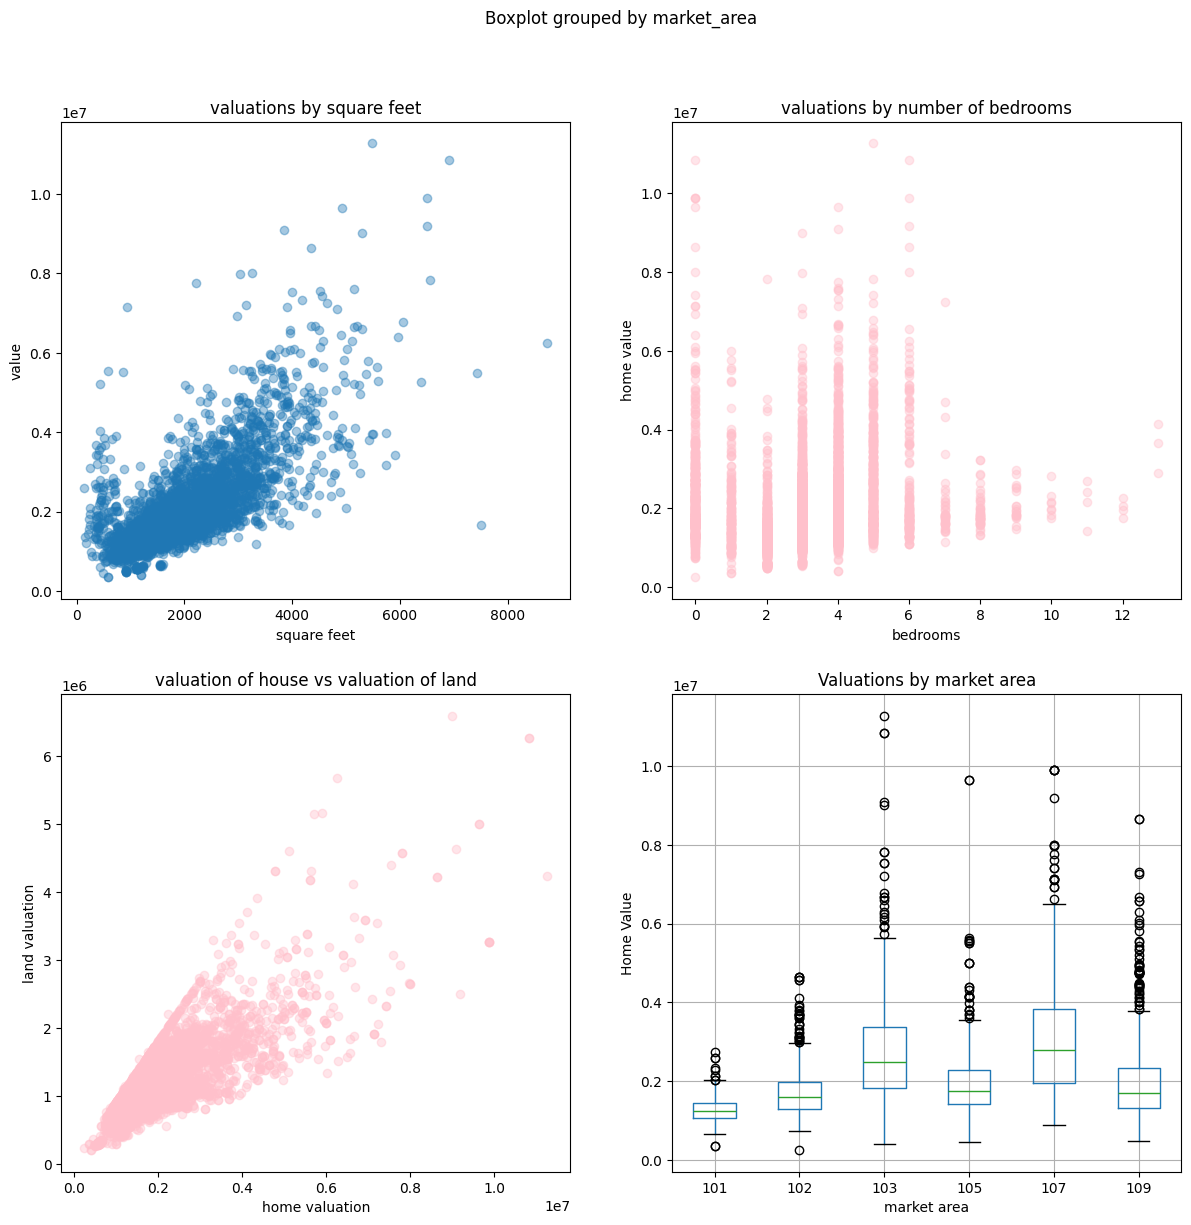

In [30]:
fig, axes = plt.subplots(2, 2, figsize = (14, 14))
one = axes[0,0]
two = axes[0,1]
three = axes[1,0]
four = axes[1,1]

one.scatter(df.total_finished_sqft, df.total_appraised_val, alpha = 0.4)
one.set_title('valuations by square feet')
one.set_xlabel('square feet')
one.set_ylabel('value')

two.scatter(df.nbr_bed_room, df.total_appraised_val, alpha = 0.4, color = 'pink')
two.set_title('valuations by number of bedrooms')
two.set_xlabel('bedrooms')
two.set_ylabel('home value')

three.scatter(df.total_appraised_val, df.land_appraised_val, color = 'pink', alpha = 0.4)
three.set_title('valuation of house vs valuation of land')
three.set_xlabel('home valuation')
three.set_ylabel('land valuation')

df.boxplot(column='total_appraised_val', by='market_area', ax = four)
four.set_title('Valuations by market area')
four.set_xlabel('market area')
four.set_ylabel('Home Value')

               count       mean     median        std
quality                                              
AVERAGE          933  1348492.0  1249000.0   597877.0
AVERAGE +        377  1416996.0  1374300.0   336897.0
AVERAGE ++       471  1629391.0  1577700.0   422472.0
EXCELLENT        108  5107416.0  4958400.0  1328869.0
EXCELLENT +       25  6402072.0  6091900.0  1621727.0
EXCELLENT++       14  7798651.0  7646650.0  1730855.0
FAIR              25  1139107.0   949400.0   592589.0
GOOD             750  1963765.0  1808550.0   756000.0
GOOD +           215  2086816.0  2030900.0   405454.0
GOOD ++          387  2388815.0  2303100.0   587710.0
LOW               12  1740158.0  1664100.0   653661.0
LOW-LOW            1   782600.0   782600.0        NaN
VERY GOOD        350  2940714.0  2752950.0   831283.0
VERY GOOD +      140  3366677.0  3389250.0   691000.0
VERY GOOD ++     152  4043211.0  4003750.0   754430.0


<Axes: >

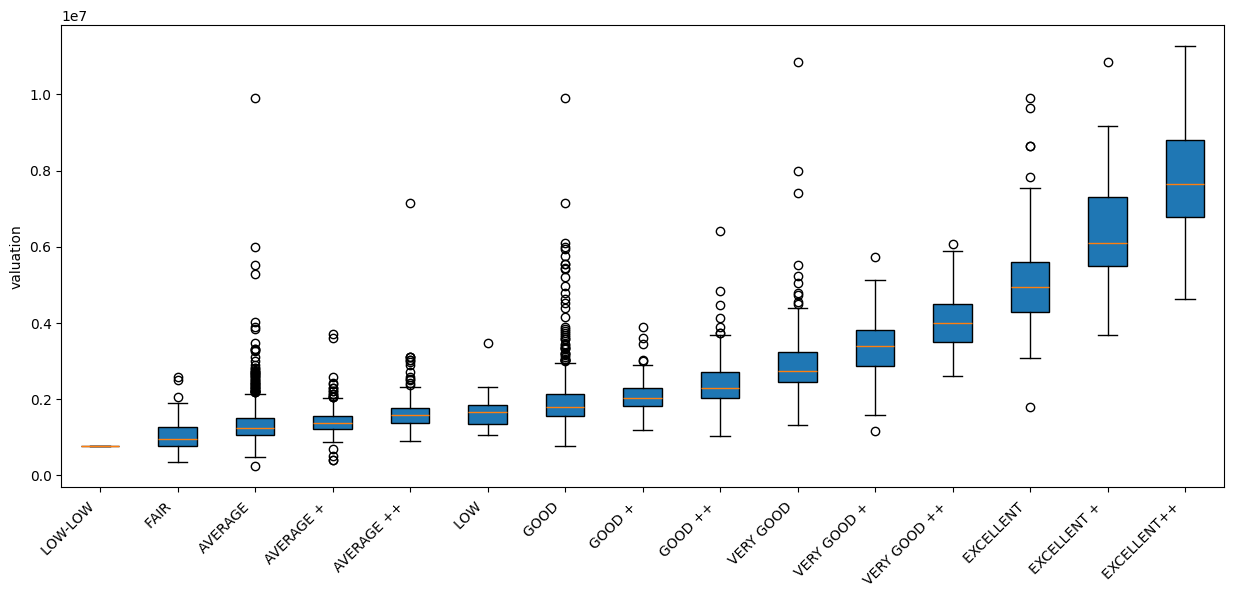

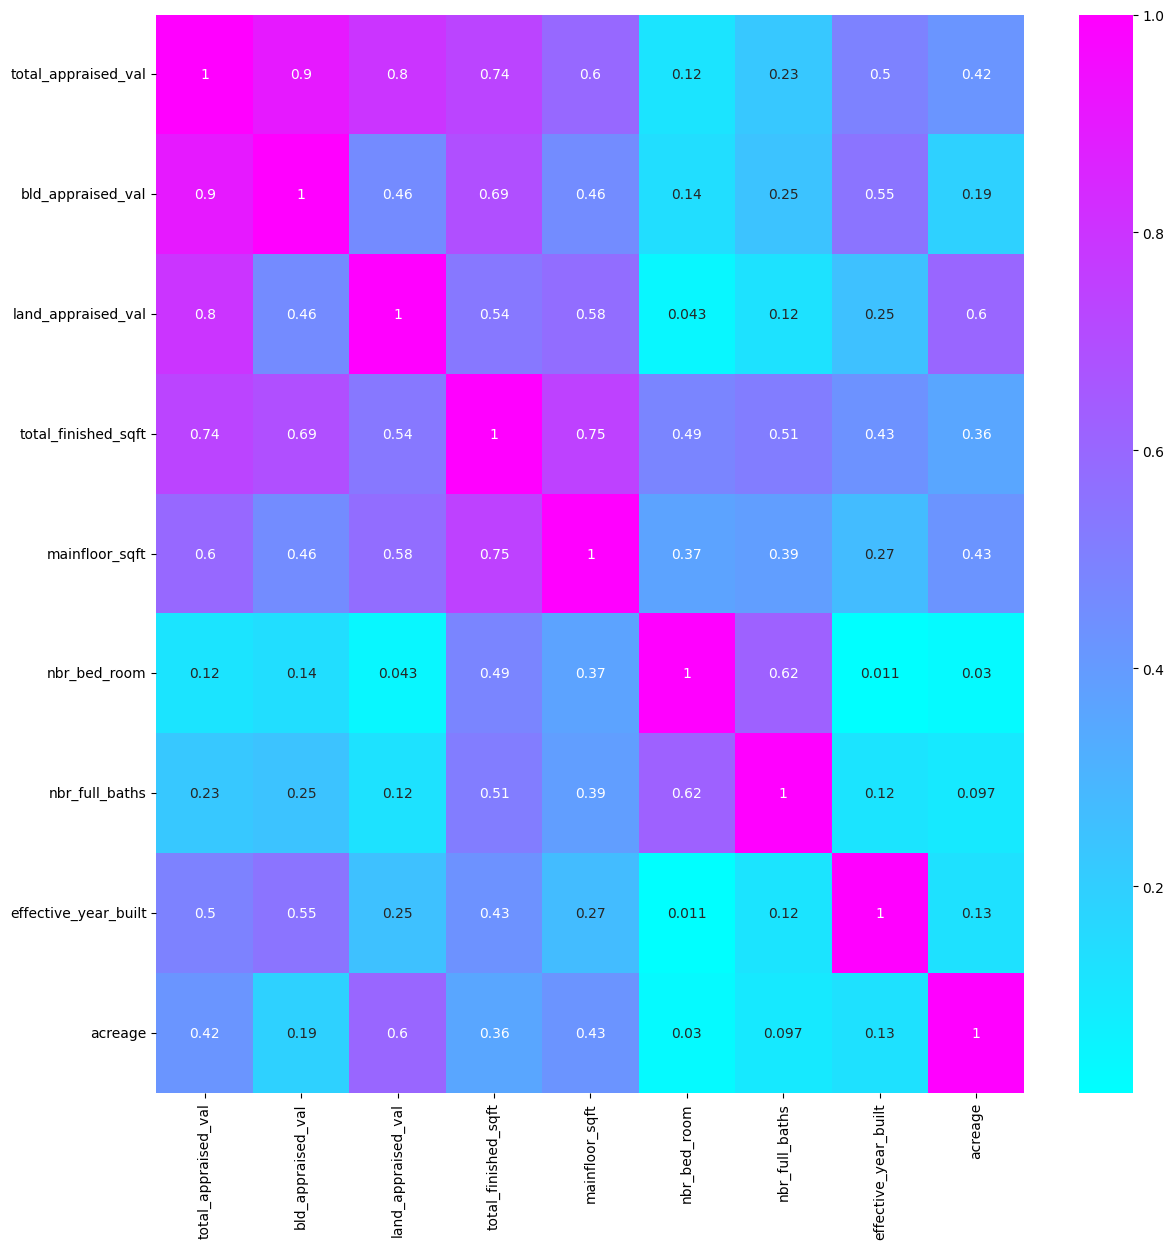

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
quality_order = df.groupby('quality')['total_appraised_val'].median().sort_values().index
quality_data = [df[df['quality'] == q]['total_appraised_val'].dropna() for q in quality_order]
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('valuation')

bp = ax.boxplot(quality_data, tick_labels=quality_order, patch_artist=True)
print(df.groupby('quality')['total_appraised_val'].agg(['count', 'mean', 'median', 'std']).round(0))
categories = ['total_appraised_val', 'bld_appraised_val', 'land_appraised_val', 'total_finished_sqft', 'mainfloor_sqft', 'nbr_bed_room', 'nbr_full_baths', 'effective_year_built', 'acreage']
available_cols = [cat for cat in categories if cat in df.columns]
corr_matrix = df[categories].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='cool')

